In [5]:
using JuMP
using GLPK
using Plots
using LinearAlgebra
using Pkg

Using Julia, plot the constraints, shade the feasible space, show the feasible basis
solution and using the graphical method, identify the optimal solution for the following LP
problem:

$$Maximise\ 3x_1+4x_2$$
$$subject\ to:  
\ 4x_1+4x_2\le16$$
$$ 3x_1+5x_2\le15$$
$$ x_1,x_2\ge0$$
Now, write its dual programme. Using Julia, plot the constraints, shade the feasible
space, show the feasible basis solution and using the graphical method, identify the
optimal solution for the dual programme.

In [23]:
model = Model(GLPK.Optimizer)
@variable(model, x1 >= 0)
@variable(model, x2 >= 0)
@objective(model, Max, 3x1 + 4x2)
@constraint(model, 4x1 + 4x2 <= 16)
@constraint(model, 3x1 + 5x2 <= 15)
optimize!(model)
println("Objective value is : ", objective_value(model))
println("x1 = ", value(x1))
println("x2 = ", value(x2))

Objective value is : 13.5
x1 = 2.5000000000000004
x2 = 1.4999999999999996


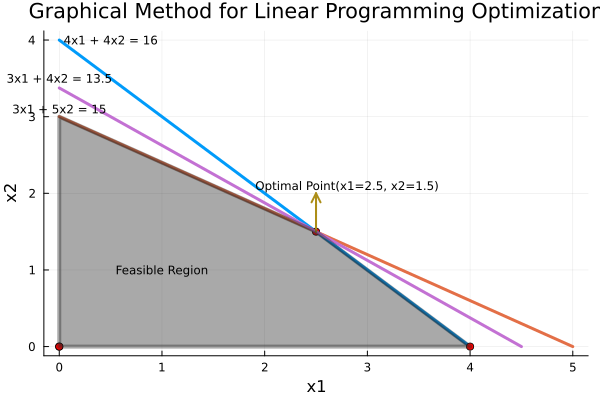

In [67]:
# Graphical Method
x1 = [0, 4]; y1 = [4, 0]
x2 = [0, 5]; y2 = [3, 0]
# Plotting constraint lines
p1 = plot(x1, y1, lw=3, annotation=[(0.5, 4, "4x1 + 4x2 = 16", 8)])
p2 = plot!(p1, x2, y2, lw=3, annotation=[(0, 3.1, "3x1 + 5x2 = 15", 8)])

# Plotting points on the feasible region
p3 = plot!(p2, [0, 2.5, 4, 0], [0, 1.5, 0, 0], seriestype=:scatter, legend=false, color="red")

obj_val = 13.5
x3 = [0, obj_val/3]; y3 = [obj_val / 4, 0] 
p4 = plot!(p3, x3, y3, lw=3, annotation=[(0, 3.5, "3x1 + 4x2 = 13.5", 8)])

# Plotting feasible region
p5 = plot!(p4, [2.5, 2.5], [1.5, 2], lw=2, arrow=0.4, annotation=[(2.8,2.1, "Optimal Point(x1=2.5, x2=1.5)", 8)])
x_feasible = [0, 0, 2.5, 4, 0]; y_feasible = [0, 3, 1.5, 0, 0]
plot!(p4, x_feasible, y_feasible, palette=cgrad(:grays), lw=4, fill=0, alpha=0.4, annotation=[(1, 1, "Feasible Region", 8)])

xlabel!("x1")
ylabel!("x2")
title!("Graphical Method for Linear Programming Optimization")

display(p5)


### For Dual programme solution, the LP problem should be like this
$$Miniimise\ 16y_1+15y_2$$
$$subject\ to:  
\ 4y_1+3y_2\ge3$$
$$ 4y_1+5y_2\ge4$$
$$ y_1,y_2\ge0$$

In [29]:
model = Model(GLPK.Optimizer)

@variable(model, y1 >= 0)
@variable(model, y2 >= 0)
@objective(model, Min, 16y1 + 15y2)

@constraint(model, 4y1 + 3y2 >= 3)
@constraint(model, 4y1 + 5y2 >= 4)
optimize!(model)
println("Objective value is : ", objective_value(model))
println("y1 = ", value(y1)) 
println("y2 = ", value(y2))


Objective value is : 13.5
y1 = 0.375
y2 = 0.5


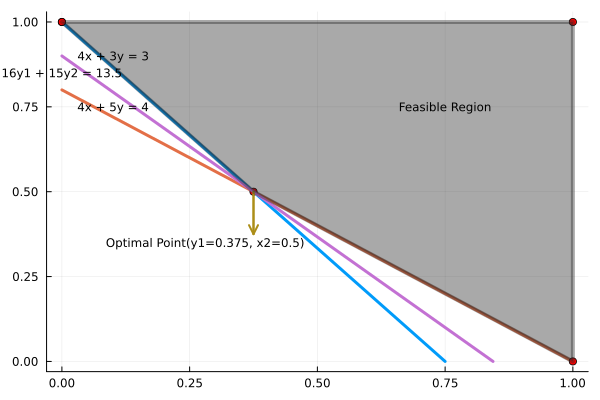

In [120]:
x1 = [0, .75]; y1 = [1, 0]
x2 = [0, 1]; y2 = [4/5, 0]
p1 = plot(x1, y1, lw=3,annotation=[(0.1,0.9,"4x + 3y = 3",8)])
p2 = plot!(p1, x2, y2, lw=3,annotation=[(0.1,0.75,"4x + 5y = 4",8)])
p3=plot!(p2, [0,3/8,1,1,0], [1,.5,0,1,1], seriestype = :scatter,legend = false,color="red")
obj_val = 13.5
x3 = [0, obj_val/16]; y3 = [obj_val/15, 0] 
p4 = plot!(p3, x3, y3, lw=3, annotation=[(0, 0.85, "16y1 + 15y2 = 13.5", 8)])

 p5 = plot!(p4, [0.375, 0.375], [0.5, 0.375], lw=2, arrow=0.4, annotation=[(0.28,0.35, "Optimal Point(y1=0.375, x2=0.5)", 8)])
x=[0,.375,1,1,0]; y=[1,.5,0,1,1]
plot!(p4, x, y, palette=cgrad(:grays), lw=4, fill=0, alpha=0.4, annotation=[(.75,.75,"Feasible Region",8)])

Given a graph G(V, E ), an s-t cut of G is a partition of its nodes V into two disjoint
sets S and T such that the node S∈T and t ∈ T. The weight of a cut w(S, T ) = ∑w(u, v)
, where w(u, v) is the weight of the edge from u to v .
Informally, this is the sum of the weights of all edges that go across the cut from S to T. A
minimum weight s-t cut is the s-t cut of minimum total weight. Your task is to
compute the minimum s-t cut for the graph below. Formulate this problem as a linear program and solve it using Julia/JuMP.

![flow_problem.png](attachment:flow_problem.png)

In [93]:
model = Model(GLPK.Optimizer)

# define the graph with edges and their weights, also for the nodes except start S and end t
edges = [
    ('s', 'a', 16), ('s', 'c', 13),
    ('a', 'b', 12), ('b', 't', 20),
    ('a', 'c', 10), ('c', 'd', 14),
    ('d', 'b', 7),  ('d', 't', 4),
    ('c', 'a', 4),  ('b', 'c', 9)
]
nodes = ['a', 'b', 'c', 'd']

# set binary variable for nodes and edges
@variable(model, y[nodes], Bin)
@variable(model, z[edges], Bin)

# minimize the sum of the weights of the edges
@objective(model, Min, sum(z[edge] * edge[3] for edge in edges))

# if a edge is part of the cut, then the variable for that edge must be 1
for edge in edges
    start_node = edge[1] == 's' ? 1 : edge[1] in nodes ? y[edge[1]] : 0  #  the 's' start
    end_node = edge[2] == 't' ? 0 : edge[2] in nodes ? y[edge[2]] : 1  # the 't' end
    @constraint(model, z[edge] >= start_node - end_node)
end
optimize!(model)
println("Minimum s-t cut weight: ", objective_value(model))

# print the edges in the cut
println("Edges in the cut:")
for edge in edges
    if value(z[edge]) > 0.1 # if it > 0 
        println("(", edge[1], ", ", edge[2], ", ", edge[3], ")")
    end
end


Minimum s-t cut weight: 23.0
Edges in the cut:
(a, b, 12)
(d, b, 7)
(d, t, 4)


Next, compute the dual LP and give an interpretation of the variables and constraints in
the dual LP.

in max-flow mini-cut theorem,the maximum amount of flow passing from the source to the sink is equal to the total weight of the edges in a minimum cut.

In [92]:
model = Model(GLPK.Optimizer)
# define edges and nodes
edges = [
    ('s', 'a', 16), ('s', 'c', 13),
    ('a', 'b', 12), ('b', 't', 20),
    ('a', 'c', 10), ('c', 'd', 14),
    ('d', 'b', 7),  ('d', 't', 4),
    ('c', 'a', 4),  ('b', 'c', 9)
]
nodes = ['a', 'b', 'c', 'd', 's', 't']

@variable(model, f[edges] >= 0)

# maximise the flow from s to t
@objective(model, Max, sum(f[('s', j, c)] for (i, j, c) in edges if i == 's'))

# constraint to the flow
for edge in edges
    @constraint(model, f[edge] <= edge[3])
end

for node in nodes
    # skip the s andt
    if node in ['s', 't']
        continue
    end
    @constraint(model, sum(f[(i, node, c)] for (i, j, c) in edges if j == node) == 
                       sum(f[(node, j, c)] for (i, j, c) in edges if i == node))
end

optimize!(model)
println("Maximum flow value: ", objective_value(model))

Maximum flow value: 23.0


### Q3

You are working on building a low-cost embedded device for the retail stores that can
automatically identify a fruit category. It has two simple sensors -- one to estimate the
height and another to estimate the width of the fruit. You are working with a machine
learning colleague to build a classification model that can learn to discriminate between
apples and pears based on these two features. Your machine learning colleague is working with the training data below and has plotted them as above with green points
representing apples and blue representing pears.
Since the embedded device has very limited computation power, you want to learn a
simple linear function such that all the apples are above it and all the pears are below it. A
quick visual inspection has convinced you that you can't separate the two sets of points
based on a horizontal or vertical line.
Your machine learning colleague insists that you should find a line with the maximum
margin (corresponding to her intuition of an SVM classifier). In other words, you need to
find a line that maximises the margin such that all points corresponding to apples are at
least above the line and all points corresponding to pears are below the line (see the
figure on the next page).
Formulate this problem as a linear programme and solve it using Julia/JuMP for the
dataset in the table below. Carefully explain all the decision variables, objective function
and the constraints involved.
Now let's say that you want to learn a quadratic function that is a
maximum margin separator for the two sets of points. In other words, you want to find a
parabola that maximises such that for all apples, and for all
pears, . Can you still formulate this as a linear programme? If so,
how?

In [89]:
apples = [(60, 62), (55, 50), (65, 68), (55, 58), (68, 65), (60, 58)]
pears = [(70, 53), (76, 40), (68, 45), (63, 45)]

model = Model(GLPK.Optimizer)

@variable(model, a)
@variable(model, b)
@variable(model, m>=0)

@objective(model, Max, m)

for (x1, x2) in apples
    @constraint(model, a*x1 + b + m <= x2)
end

for (x1, x2) in pears
    @constraint(model, a*x1 + b - m >=x2)
end
optimize!(model)

if termination_status(model) == MOI.OPTIMAL
    optimal_a = value(a)
    optimal_b = value(b)
    optimal_m = value(m)
    println("Optimal weights:a = ", optimal_a, ",b= ", optimal_b)
    println("Optimal margin: m = ", optimal_m)
end

Optimal weights:a = 1.1538461538461542,b= -20.57692307692311
Optimal margin: m = 7.115384615384616


### Q4
You are working for an engineering company and your task is to predict the power
required for a crane, given its speed. You want to learn a linear function that can do the
prediction based on the training data below. However, you have heard that trying to find a line that minimises the least squares errors of points from the line is sensitive to outliers,
so you want to find a line that minimises the absolute value of errors instead. Thus, your
goal is to learn a linear function such that is minimised. Formulate this problem as a linear
programme and solve it using Julia/JuMP for the above data. Carefully explain all the
decision variables, objective function and the constraints involved. Explain how you
converted the apparent non-linear objective function into a linear one.

In [12]:
# set the speed and power into list
speed = [2.0, 3.0, 1.0, 2.0, 6.0, 7.0, 6.0, 8.0, 10.0, 9.0]
power = [0.3, 0.3, 0.3, 0.4, 0.5, 0.5, 0.6, 0.6, 0.7, 0.5]

model = Model(GLPK.Optimizer)

@variable(model, a)
@variable(model, b)
@variable(model, e[1:length(speed)] >= 0)

@objective(model, Min, sum(e))

for i in 1:length(speed)
    @constraint(model, e[i] >= a*speed[i] + b - power[i])
    @constraint(model, e[i] >= -(a*speed[i] + b - power[i]))
end
optimize!(model)
println("a: ", value(a))
println("b: ", value(b))


a: 0.04285714285714286
b: 0.2571428571428571
